In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

### Ratings file
Each line contains a rated video game:

- a user
- an item
- a rating from 1 to 5

In [12]:
raw_ratings = pd.read_csv('ratings.csv', sep=',')

raw_ratings.head()

,id,rate,appid
0,76561197960265729,1.0,10
1,76561197960265729,1.0,20
2,76561197960265729,1.0,30
3,76561197960265729,1.0,40
4,76561197960265729,1.0,50


### Metadata file

This file contains information about each game, specifically:
- item
- name
- genres

In [13]:
items = pd.read_csv('metadata.csv', sep=',')

items.head()

,appid,appname,genres
0,10,Counter-Strike,1/
1,20,Team Fortress Classic,1/
2,30,Day of Defeat,1/
3,40,Deathmatch Classic,1/
4,50,Half-Life: Opposing Force,1/


In [14]:
all_ratings = pd.merge(items, raw_ratings)

all_ratings.head()

,appid,appname,genres,id,rate
0,10,Counter-Strike,1/,76561197960265729,1.00
1,10,Counter-Strike,1/,76561197960265730,2.05
2,10,Counter-Strike,1/,76561197960265731,1.00
3,10,Counter-Strike,1/,76561197960265733,1.40
4,10,Counter-Strike,1/,76561197960265734,1.00


### Data pre-analysis
Survey the data and analyze its distribution and statistics. The following are computed:

- number of users
- number of items
- rating distribution

In [15]:
all_ratings['rate'].describe()

count    2.573393e+07
mean     1.275410e+00
std      7.960212e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.100000e+00
max      5.950000e+00
Name: rate, dtype: float64

#### Maximum Stats

In [23]:
print(all_ratings['id'].value_counts().index.tolist()[0])
print(all_ratings['id'].value_counts().tolist()[0])

177297
10440


User 76561197973009892 contains the most games in our dataset, with more than 10440 ratings.

In [24]:
print(all_ratings['appid'].value_counts().index.tolist()[0])
print(all_ratings['appid'].value_counts().tolist()[0])

15
364650


Game 15 has the most ownerships, with 364.650 owners, or about 53.89% of our user dataset.

#### User Game Statistics

In [18]:
users_nb = all_ratings['id'].value_counts().reset_index()
users_nb.columns= ['id','nb_lines']
users_nb['nb_lines'].describe()

count    676668.000000
mean         38.030361
std         123.929002
min           1.000000
25%           4.000000
50%           8.000000
75%          22.000000
max       10440.000000
Name: nb_lines, dtype: float64

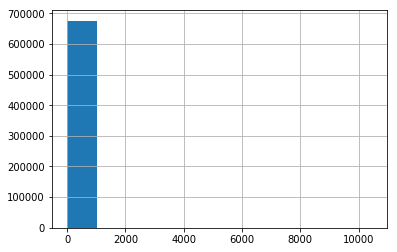

In [19]:
import seaborn
users_nb['nb_lines'].hist()

Half the user dataset owns not more than 8 games.

#### Game ownership stats

In [27]:
games_nb = all_ratings['appid'].value_counts().reset_index()
games_nb.columns= ['appid','nb_lines']
games_nb['nb_lines'].describe()

count     18865.000000
mean       1364.109621
std        8333.452088
min           1.000000
25%          13.000000
50%          86.000000
75%         510.000000
max      364650.000000
Name: nb_lines, dtype: float64

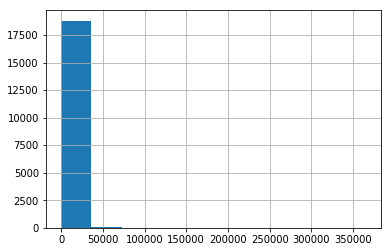

In [28]:
games_nb['nb_lines'].hist()

Half of the game dataset has no more than 86 ownerships

### Data pre-processing

In [20]:
users = all_ratings.id.unique()
user_map = {i:val for i,val in enumerate(users)}
inverse_user_map = {val:i for i,val in enumerate(users)}


games = all_ratings.appid.unique()
game_map = {i:val for i,val in enumerate(games)}
inverse_game_map = {val:i for i,val in enumerate(games)}

all_ratings["id"] = all_ratings["id"].map(inverse_user_map)

all_ratings["old_id"] = all_ratings["appid"] # copying for join with metadata
all_ratings["appid"] = all_ratings["appid"].map(inverse_game_map)

print ("A total of: ", users.shape[0], "unique users")
print ("A total of: ", games.shape[0], "unique games")

A total of:  676668 unique users
A total of:  18865 unique games


In [21]:
all_ratings.sort_values('rate', ascending=False).head(10)

,appid,appname,genres,id,rate,old_id
543073,2,Day of Defeat,1/,100887,5.95,30
2433028,11,Counter-Strike: Source,1/,364830,5.95,240
13934442,1625,Football Manager 2013™,28/18/,560547,5.95,207890
25295968,13817,PLAYERUNKNOWN'S BATTLEGROUNDS,73/1/25/29/,475864,5.95,578080
6266506,283,BioShock Infinite,1/,428206,5.95,8870
23728290,8791,Raw Data,1/23/2/,280654,5.95,436320
6827805,333,Call of Duty®: Modern Warfare® 2,1/,446221,5.95,10190
24754130,11471,Panzer Warfare,1/4/23/29/28/2/70/,358534,5.95,513880
9434766,811,Arma 2: Operation Arrowhead,1/28/2/,404183,5.95,33930
18807596,2846,XCOM® 2,2/,45380,5.95,268500
